In [3]:
! pip install openai

In [4]:
! pip install langchain_community

In [5]:
! pip install langchain_chroma

In [6]:
! pip install langchain_openai

In [7]:
! pip install langchain_community

# Advanced RAG Technique - Query Optimization

Multi-query is a technique used in advanced RAG models that improve the retrieval of relevant documents for complex user questions.

Imagine a user asks the following question: “What is LangSmith, and why do we need it?” A simple retrieval system might only find documents containing the exact phrase “LangSmith.” But what if the document discusses LangSmith using synonyms or related concepts? Here, multi-query helps by generating multiple variations of the original question, capturing different aspects of the user’s intent. This broadens the search and retrieves documents that might not contain the exact keywords but still hold valuable information.

What is multi-query?
Multi-query utilizes an LLM to automatically generate reformulations of the user’s original question. It aims to create multiple versions that capture different perspectives on the user’s intent, increasing the chances of finding relevant documents even when the wording differs slightly. Here’s how it works:

Single user input: It all starts with a single question the user poses.

Query diversification: The core concept of multi-query is to expand the search beyond the original query. This is achieved by using LLMs or other techniques to rephrase the question into various forms. Imagine asking the question differently to capture the full scope of what you’re looking for.

Multiple queries generation: The LLM generates several reformulated versions of the original query, each capturing a different aspect or perspective of the user’s intent.

Parallel search execution: These multiple reformulated queries are then used to perform parallel searches across the document collection.

Document retrieval: Each reformulated query retrieves a set of documents that are relevant to that specific phrasing of the question.

Results aggregation: The retrieved documents from all the different queries are aggregated. This aggregation ensures a broader and more comprehensive set of documents that might contain the relevant information.

Enhanced relevance assessment: The aggregated documents are then evaluated for relevance, ensuring that the most pertinent information is identified from the diverse set of retrieved documents.

Foundation for further steps: The retrieved documents based on each query variation become the building blocks for subsequent steps in the RAG process.

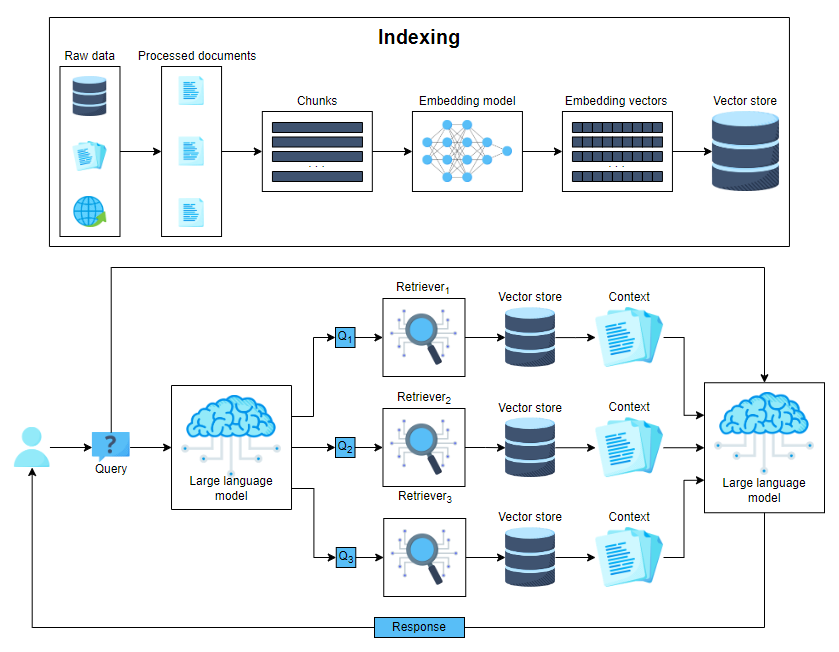

# Important necessary libraries

In [8]:
! pip install chromadb

In [29]:
! pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.8 MB/s eta 0:00:00


# Import necessary libraries

In [27]:
import os
import bs4
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from operator import itemgetter
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnablePassthrough

# Set up the LangSmith and OpenAI API keys

The following code snippet sets up your LangChain API key and OpenAI API key from environment variables. We’ll need valid API keys to interact with the LangChain and OpenAI language models

Code Explanation :

Sets up the LangChain environment variables:

LANGCHAIN_TRACING_V2: Enables tracing for LangChain operations.

LANGCHAIN_ENDPOINT: Specifies the endpoint for the LangChain API.

LANGCHAIN_API_KEY: An empty string placeholder for the LangSmith LangChain API key. Replace it with your actual key.

LANGCHAIN_PROJECT: Sets the project name for LangChain operations to 'Multi-Query'.

LSets up the OpenAI API key:

OPENAI_API_KEY: An empty string placeholder for the OpenAI API key. Replace it with your actual key.

Validation: Checks if the OPENAI_API_KEY is empty and raises a ValueError if it is, ensure a valid API key is provided for authenticating OpenAI API requests.

In [25]:
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = '' # Add your LangSmith LangChain API key
os.environ['LANGCHAIN_PROJECT']='Multi-Query'

OPENAI_API_KEY = os.environ["OPENAI_API_KEY"] = ""  # Add your OpenAI API key
if OPENAI_API_KEY == "":
    raise ValueError("Please set the OPENAI_API_KEY environment variable")

# Prepare data and split text

Loaders are defined to read pdf files using PyPDFLoader, specifying the file paths of the documents to be loaded.

An empty list docs is created, and a loop iterates over the loaders, loading the content of each document and extending the docs list with the loaded content.

A RecursiveCharacterTextSplitter is initialized with a chunk size of 10000 characters and an overlap of 1000 characters between chunks. The splitter then processes the docs list, splitting each document into smaller chunks suitable for processing by LLMs.

In [32]:
loaders = [
    PyPDFLoader("Attention_is_all_you_need.pdf"),
    PyPDFLoader("Improvingaccuracyofpretrainedwordembeddingsforsentimentanalysis.pdf")
]

docs = []
for loader in loaders:
    docs.extend(loader.load())

text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000 , chunk_overlap=1000)
docs = text_splitter.split_documents(docs)

In [33]:
print(len(docs))

30


In [34]:
docs[0].page_content

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurren

In [35]:
docs[29].page_content

'[35] X. Ouyang, P. Zhou, C. Li, L. Liu, Sentiment Analysis Using Convolutional Neural Network, IEEE \nInternational Conference on Computer and Information Technology; Ubiquitous Computing and \nCommunications; Dependable, Autonomic and Secure Computing; Pervasive Intelligence and Computing \n(CIT/IUCC/DASC/PICOM). (2015) \n[36] J. Deriu, A. Lucchi, V. Luca, T. Hofmann, M. Jaggi, Leveraging Large Amounts of Weakly Supervised  \nData for Multi-Language Sentiment Classification, International World Wide Web Conference Committee \n(IW3C2). (2017) 1045-1052. \n[37] B. Pang, L. Lee, Seeing stars: Exploiting class relationships for sentiment categorization with respect \nto rating scales, In: Proceedings of the 43rd Annual Meeting on Association for Computational Linguistics. \n(2005) 115-124. \n[38] R. Socher, A. Perelygin, J.Wu, J. Chuang, C. Manning, A. Ng, C. Potts, Recursive Deep Models for \nSemantic Compositionality Over a Sentiment Treebank, In: Proceedings of EMNLP. (2013) \n[39] O.

# Index documents

After splitting the text, we create a vector store to efficiently store and retrieve document chunks. Additionally, we generate embeddings for each chunk to capture its semantic meaning

We use Chroma to create the vector store (vectorstore) with our prepared text chunks (splits) and generate embeddings using OpenAIEmbeddings to capture semantic relationships between words in the text snippets.

Finally, we convert the vector store into a retriever using as_retriever(), enabling the retrieval of documents based on a query embedding

In [36]:
# Index
vectorstore = Chroma.from_documents(documents=docs, embedding=OpenAIEmbeddings())

retriever = vectorstore.as_retriever()

# Generate multi-perspective query with LLM

Now that we have prepared and indexed our data, we can focus on the core functionality of multi-query. Here, we will use an LLM to generate multiple variations of the user’s original question

We define a prompt template instructing the AI to generate three variations of the user’s question, capturing different aspects to help the search engine retrieve relevant documents. The AI should provide these alternative questions on separate lines.

We create the prompt_perspectives object using ChatPromptTemplate.from_template(template). This sets up the template for the AI to follow when generating the query variations.

We define the generate_queries chain, which processes the prompt and generates the reformulated queries:

prompt_perspectives: This is the output from the previous line, containing information about the user’s question.

| ChatOpenAI(temperature=0): This part uses a function called ChatOpenAI. ChatOpenAI interacts with the OpenAI API to generate creative text formats and temperature=0 sets a parameter to control the randomness of the generated text (0 means minimal randomness).

| StrOutputParser(): The StrOutputParser converts the model’s output into a text string.

| (lambda x: x.split("\n")): Finally, a lambda function splits this string by newlines (\n), resulting in a list of the original question and the three generated query variations.

In [45]:
template = """You are an AI language model assistant tasked with generating informative queries for a vector search engine.
The user has a question: "{question}"
Your goal is to create five variations of this question that capture different aspects of the user's intent. These variations will help the search engine retrieve relevant documents even if they don't use the exact keywords as the original question.
Provide these alternative questions, each on a new line.**
Original question: {question}"""

prompt_perspectives = ChatPromptTemplate.from_template(template)

generate_queries = (
    prompt_perspectives
    | ChatOpenAI(temperature=0)
    | StrOutputParser()
    | (lambda x: x.split("\n"))
)

# Retrieve documents using multi-query

We will now utilize the generated multi-perspective queries to retrieve relevant documents from the indexed corpus

The get_unique_union function ensures the retrieval of unique documents from the search results.

Flattening the structure: The function starts by flattening the list of lists containing the retrieved documents. This transforms it into a single list where each document is an individual element.

Uniqueness check: It checks if the documents have a unique identifier attribute, like 'id'. If such an attribute exists, it extracts those unique IDs and uses a set to eliminate duplicates.

String conversion (alternative): If no unique identifier attribute is found, the function converts each document object into a string representation. This allows for set-based operations to identify and remove duplicates.

Return unique documents: Finally, the function returns a list containing only the unique documents.

We define a sample user question, "What is LangSmith, and why do we need it?".

The retrieval_chain combines the process of generating multiple queries (generate_queries) with document retrieval functionality (retriever.map). The output of the retrieval chain is passed through get_unique_union to ensure only unique documents are considered in the final results.

The chain is invoked with the user question as input, triggering the retrieval process and storing the retrieved documents in the docs variable. The length of docs indicates the number of unique documents retrieved using the multi-perspective queries.

invoked the generate_queries chain to visualize 5 variants of the question declared

In [46]:
def get_unique_union(documents: list[list]):
  """ Unique union of retrieved docs """
  # Flatten list of lists
  flattened_docs = [doc for sublist in documents for doc in sublist]

  # Option 1: Check library documentation for hashable attribute (e.g., 'id')
  if hasattr(flattened_docs[0], 'id'):  # Replace 'id' with the appropriate attribute
      unique_docs = list(set(doc.id for doc in flattened_docs))

  # Option 2: Convert to string (if suitable)
  else:
      unique_docs = list(set(str(doc) for doc in flattened_docs))

  return unique_docs

In [47]:
# Retrieve
question = "What is Positional encoding, and why do we need it?"
retrieval_chain = generate_queries | retriever.map() | get_unique_union
docs = retrieval_chain.invoke({"question":question})
len(docs)

1

In [53]:
retrieval_chain

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='You are an AI language model assistant tasked with generating informative queries for a vector search engine.\nThe user has a question: "{question}"\nYour goal is to create five variations of this question that capture different aspects of the user\'s intent. These variations will help the search engine retrieve relevant documents even if they don\'t use the exact keywords as the original question.\nProvide these alternative questions, each on a new line.**\nOriginal question: {question}'), additional_kwargs={})])
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x785d06ccc670>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x785d06ccf400>, root_client=<openai.OpenAI object at 0x785d06f47940>, root_async_clien

In [48]:
generate_queries.invoke({"question":question})

['1. How does Positional encoding enhance the performance of neural networks?',
 '2. What role does Positional encoding play in the context of natural language processing?',
 '3. Can you explain the significance of Positional encoding in deep learning models?',
 '4. What are the benefits of incorporating Positional encoding in machine learning algorithms?',
 '5. How does Positional encoding help address the issue of sequential information in neural networks?']

# Run the RAG model

The template defines how the AI should structure its response:

Context and question: It asks the AI to answer the question based on the provided context.

Template initialization: The ChatPromptTemplate.from_template method initializes the prompt using this template.

The ChatOpenAI model is initialized with a temperature setting of 0 , indicating deterministic responses.

The final_rag_chain orchestrates the retrieval and generation process:

Context and question extraction: It extracts the context using the retrieval_chain and the question using the itemgetter.

Prompt application: The extracted context and question are formatted into the prompt.

LLM interaction: The formatted prompt is passed to the ChatOpenAI model to generate a response.

Parsing response: The response from the LLM is parsed into a string format using StrOutputParser.

The final_rag_chain is invoked with the user question, "What is Positional encoding, and why do we need it?". This triggers the retrieval of relevant documents and uses them to generate an answer through the RAG model

In [54]:
# RAG
template = """Answer the following question based on this context:
{context}
Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)

llm = ChatOpenAI(temperature=0)

final_rag_chain = (
    {"context": retrieval_chain,
     "question": itemgetter("question")}
    | prompt
    | llm
    | StrOutputParser()
)

In [55]:
final_rag_chain.invoke({"question":question})

'Positional encoding is a technique used in the field of natural language processing to inject information about the position of words in a sequence into the input embeddings. This is necessary because traditional word embeddings do not inherently contain information about the order of words in a sentence. By adding positional encoding to the input embeddings, the model is able to differentiate between words based on their position in the sequence, which is crucial for tasks such as language translation and sentiment analysis.'